In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv("mall customers.csv")

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
label = LabelEncoder()
df['Gender'] = label.fit_transform(df['Gender'])

In [7]:
df = df.rename(columns={"Annual Income (k$)" : "Income", "Spending Score (1-100)" : "Score"})

In [8]:
df = df.drop(['CustomerID'], axis=1)

In [9]:
df.head()

,Gender,Age,Income,Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [10]:
df.isna().sum()

Gender    0
Age       0
Income    0
Score     0
dtype: int64

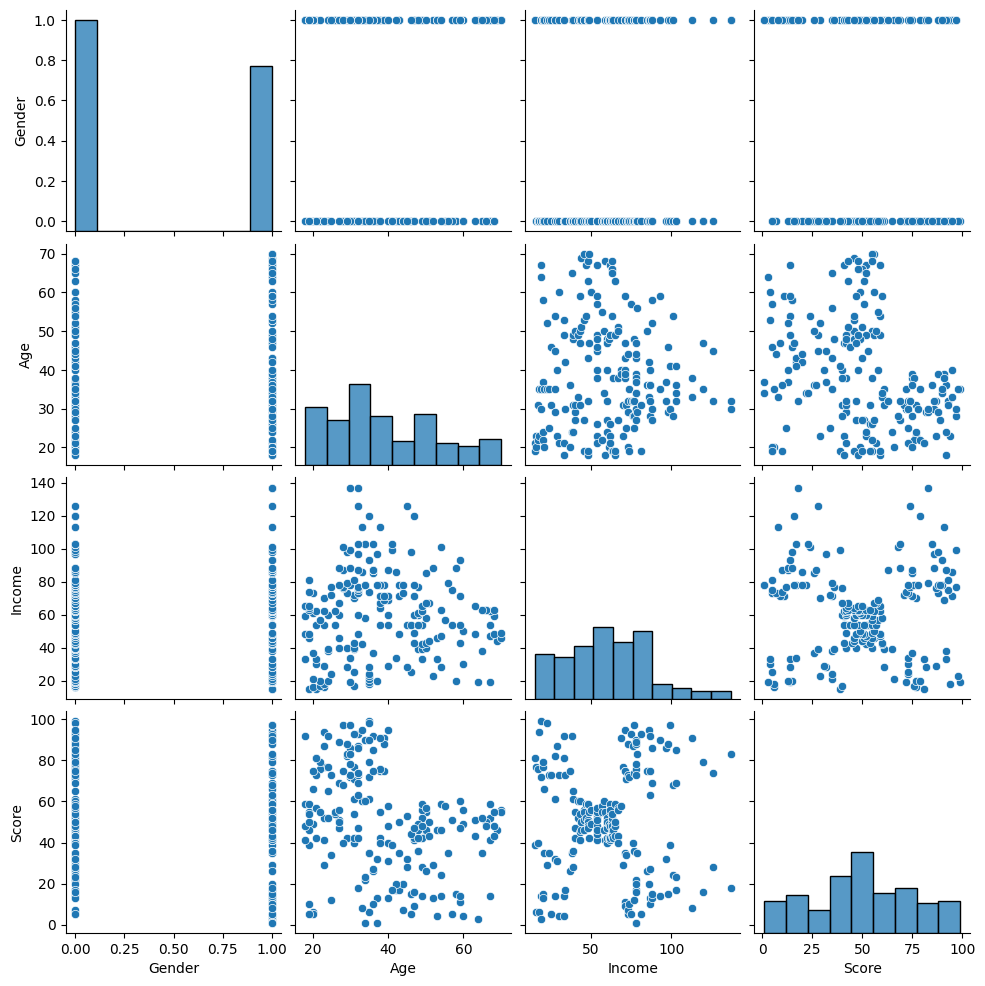

In [11]:
plt.Figure(figsize=(4,4))
sns.pairplot(df)

<Axes: xlabel='Score', ylabel='Income'>

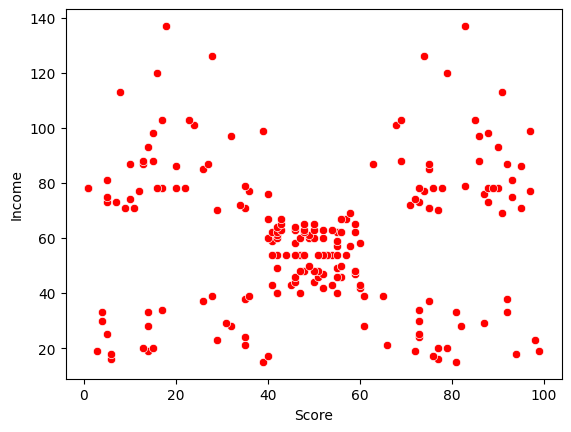

In [12]:
plt.Figure(figsize=(3,4))
sns.scatterplot(x = df.Score, y = df.Income, color = 'r')

In [13]:
df.corr()

,Gender,Age,Income,Score
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Income,0.056410,-0.012398,1.000000,0.009903
Score,-0.058109,-0.327227,0.009903,1.000000


<Axes: >

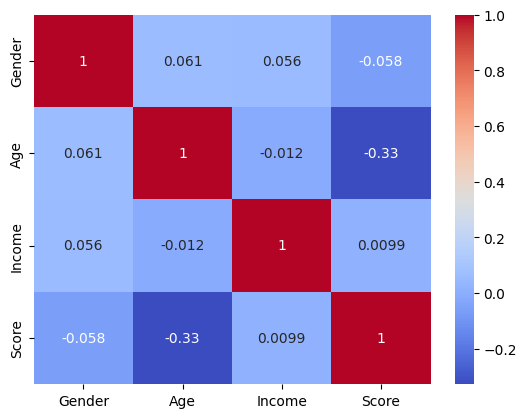

In [14]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

<Axes: >

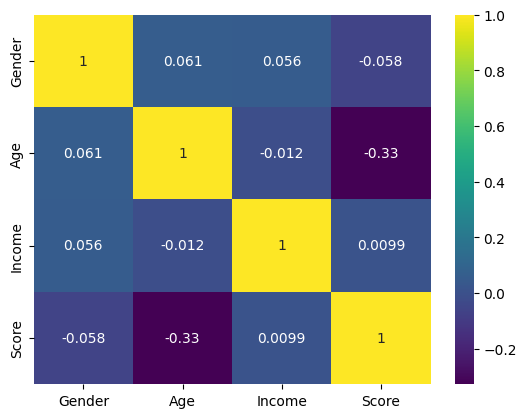

In [15]:
sns.heatmap(df.corr(), annot=True, cmap="viridis")

<Axes: >

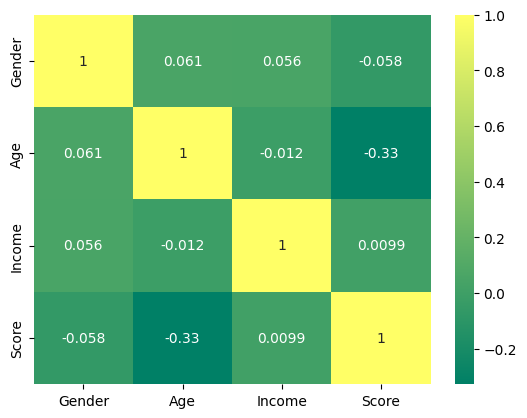

In [16]:
sns.heatmap(df.corr(), annot=True, cmap="summer")

<Axes: >

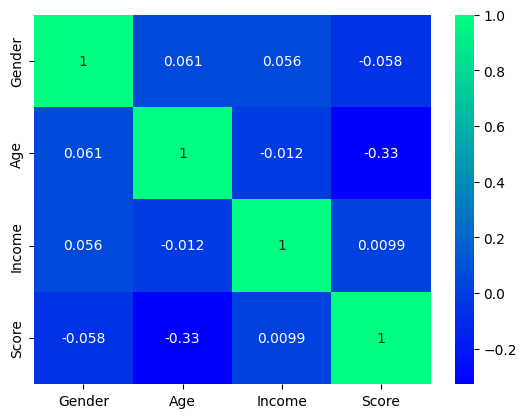

In [17]:
sns.heatmap(df.corr(), annot=True, cmap="winter")

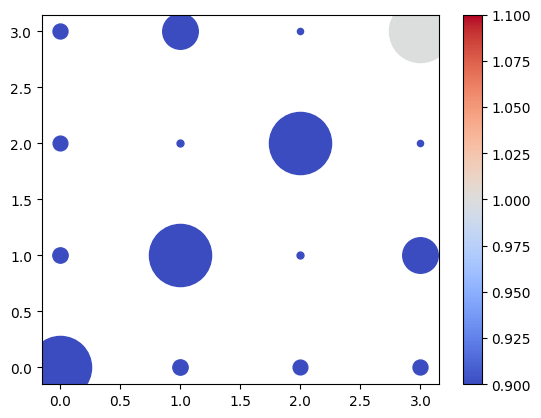

In [18]:
corr = df.corr()

for i in range(len(corr)):
  for j in range(len(corr)):
    plt.scatter(i, j,
                s = abs(corr.iloc[i, j])*2000,
                c = corr.iloc[i, j],
                cmap='coolwarm'
                )

plt.colorbar()
plt.show()

<Axes: xlabel='Income', ylabel='Count'>

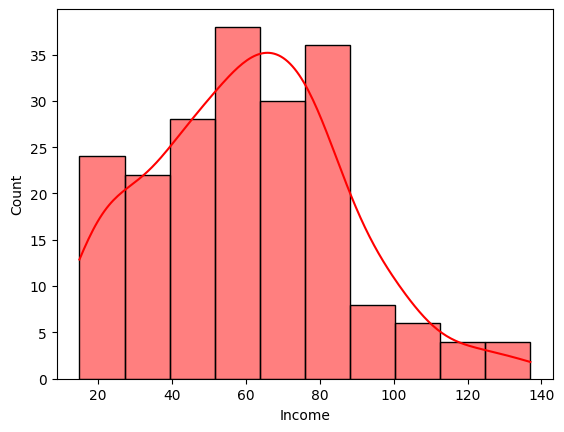

In [19]:
plt.Figure(figsize=(4,3))
sns.histplot(x = df.Income, color='r', kde=True)

<Axes: xlabel='Score', ylabel='Count'>

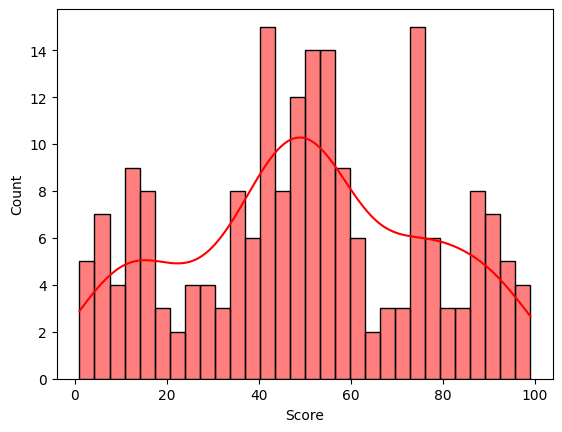

In [20]:
plt.Figure(figsize=(4,3))
sns.histplot(x = df.Score, color='r', kde=True, bins=30)

In [21]:
kmean = KMeans(n_clusters=5)

In [22]:
model = kmean.fit(df[['Income', 'Score']])

In [23]:
model

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [24]:
pred = model.predict(df[['Income', 'Score']])

In [25]:
pred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0,
       1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0], dtype=int32)

In [26]:
df['cluster_pred'] = pred

In [27]:
df.head(10)

,Gender,Age,Income,Score,cluster_pred
0,1,19,15,39,4
1,1,21,15,81,2
2,0,20,16,6,4
3,0,23,16,77,2
4,0,31,17,40,4
5,0,22,17,76,2
6,0,35,18,6,4
7,0,23,18,94,2
8,1,64,19,3,4
9,0,30,19,72,2


In [28]:
cluster_center = model.cluster_centers_

In [29]:
cluster_center

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [30]:
df0 = df[df['cluster_pred'] == 0]
df1 = df[df['cluster_pred'] == 1]
df2 = df[df['cluster_pred'] == 2]
df3 = df[df['cluster_pred'] == 3]
df4 = df[df['cluster_pred'] == 4]
# df5 = df[df['cluster_pred'] == 5]
# df6 = df[df['cluster_pred'] == 6]
# df7 = df[df['cluster_pred'] == 7]

In [31]:
df0

,Gender,Age,Income,Score,cluster_pred
123,1,39,69,91,0
125,0,31,70,77,0
127,1,40,71,95,0
129,1,38,71,75,0
131,1,39,71,75,0
133,0,31,72,71,0
135,0,29,73,88,0
137,1,32,73,73,0
139,0,35,74,72,0
141,1,32,75,93,0


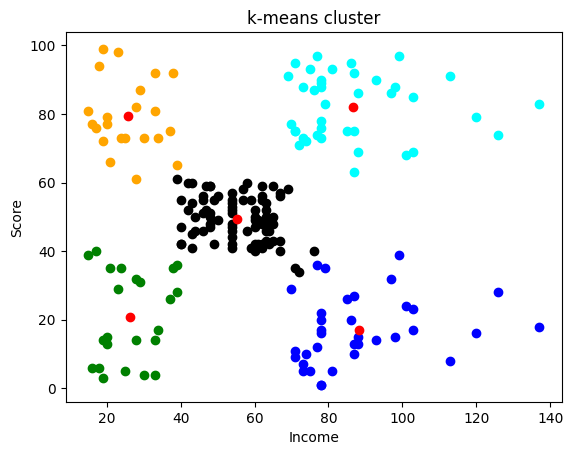

In [32]:
plt.Figure(figsize=(12,8))
plt.scatter(df0.Income, df0.Score, color='cyan')
plt.scatter(df1.Income, df1.Score, color='black')
plt.scatter(df2.Income, df2.Score, color='orange')
plt.scatter(df3.Income, df3.Score, color='blue')
plt.scatter(df4.Income, df4.Score, color='green')
# plt.scatter(df5.Income, df5.Score, color='yellow')
# plt.scatter(df6.Income, df6.Score, color='purple')
# plt.scatter(df7.Income, df7.Score, color='gray')

plt.scatter(cluster_center[:,0], cluster_center[:, 1], color="red")
plt.title("k-means cluster")
plt.xlabel("Income")
plt.ylabel("Score")
plt.show()

In [ ]:

model.predict(np.array([[28,61]]))


c:\Users\ABDULLAH AL MASUM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2], dtype=int32)

In [34]:
# elbow method

wcss = []
clus = range(2,15)

for k in clus:
  kmean = KMeans(n_clusters=k)
  kmean.fit(df[['Income', 'Score']])
  wcss.append(kmean.inertia_)


In [35]:
wcss

[185917.14253928524,
 106348.37306211118,
 73679.78903948836,
 67818.53314081409,
 37455.984555160285,
 30566.451130251866,
 26654.787091054335,
 22848.98080385028,
 20080.72737314867,
 22839.32616014017,
 17149.64012392836,
 15865.959806859808,
 13519.1079542851]

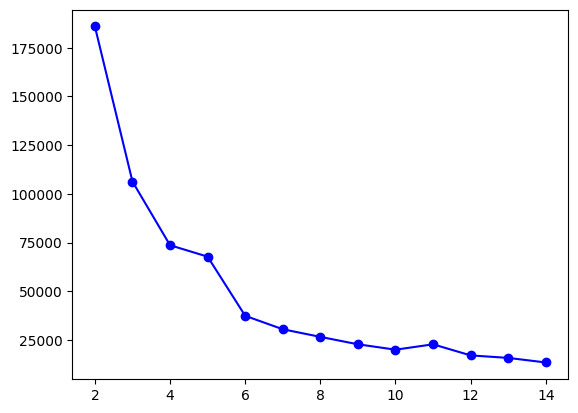

In [36]:
plt.Figure(figsize=(4,3))
plt.plot(clus, wcss, color = 'blue', marker = 'o')

In [37]:
# pip install kneed

In [38]:
from kneed import KneeLocator
knl = KneeLocator(clus, wcss,curve = "convex" ,direction='decreasing')

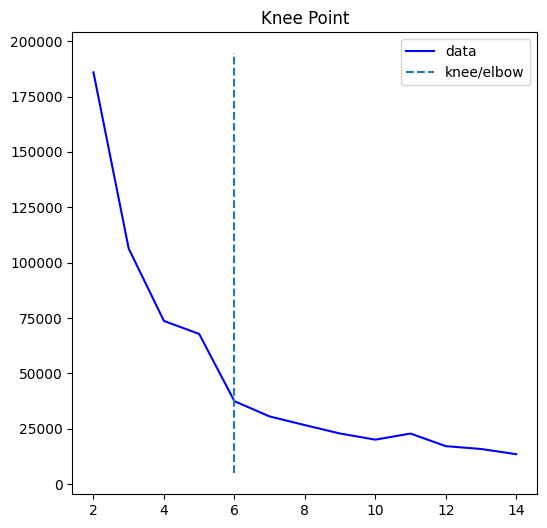

In [39]:
knl.plot_knee()